<a href="https://colab.research.google.com/github/zata213/Applied_Machine_Learning_S20_Assignments/blob/master/Notebook/assignment-set-14/regression_housing_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression on the [California Housing Values](https://github.com/ageron/handson-ml/tree/master/datasets/housing) dataset using SVM with Python's Scikit-Learn
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (26 June 2020)

### Preperation for Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#unzip dataset files from google drive to content folder in colab

import os

if os.path.exists("/content/housing/")==False:
  print("unzip files!")
  !unzip -q "/content/drive/My Drive/housing.zip"

mypath="/content/housing/"

unzip files!


In [3]:
#Define path to the directory
 
os.chdir(mypath)

print(os.getcwd())

/content/housing


### Import libraries

In [4]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# to make this notebook's output identical at every run
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [5]:
data=pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Descriptive statistics and data visualizations

In [8]:
#Describe the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

ocean_proximity    5
dtype: int64

In [10]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


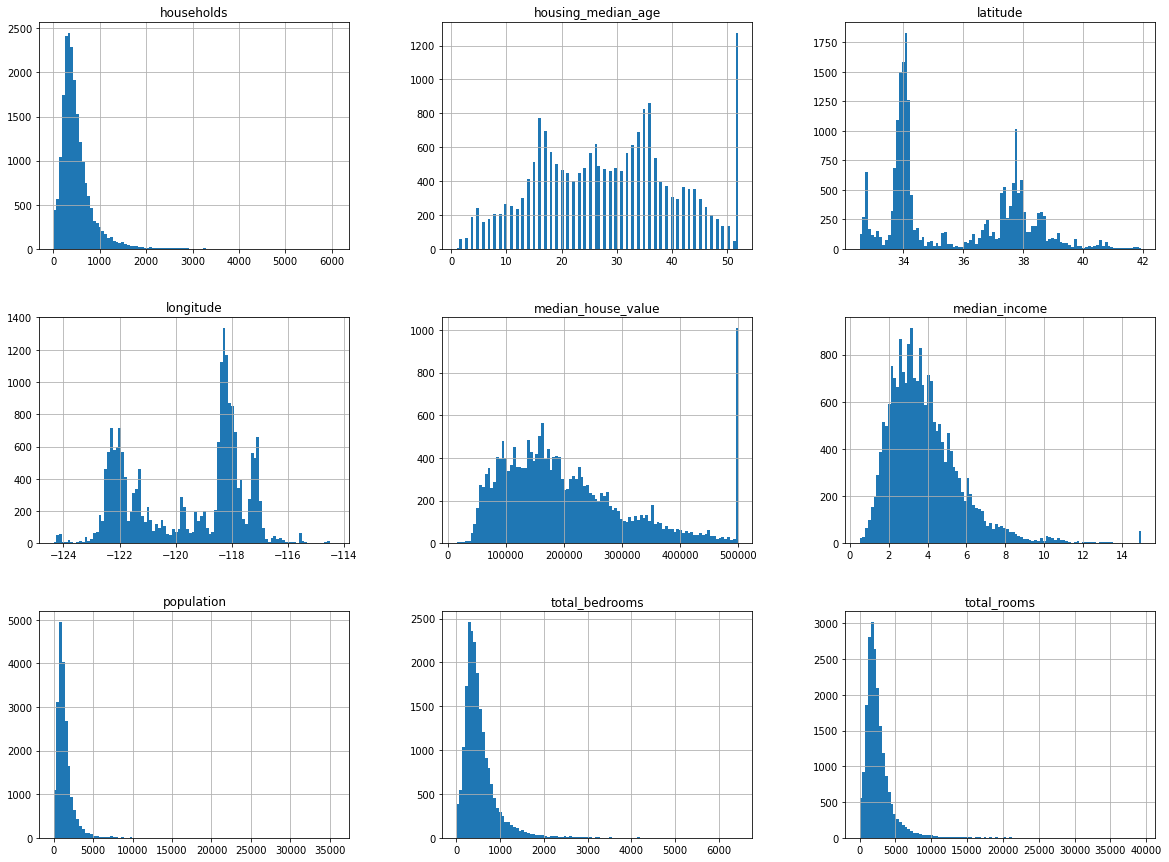

In [11]:
data.hist(bins=100, figsize=(20,15))

plt.show()

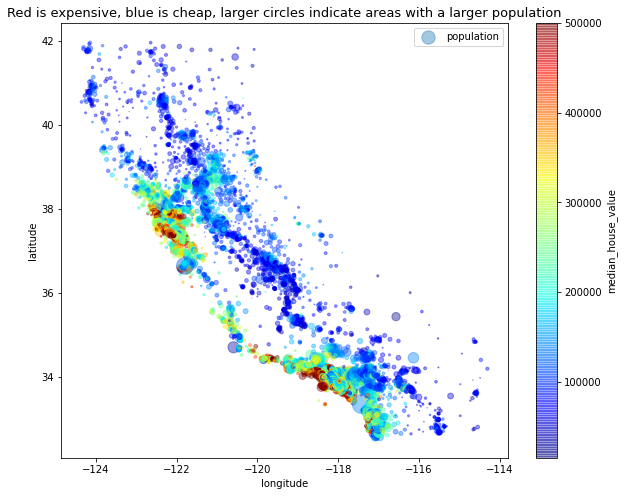

In [12]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Red is expensive, blue is cheap, larger circles indicate areas with a larger population',\
          fontweight = 20, fontsize = 13)
plt.legend()

In [13]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [14]:
#from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms",
             # "housing_median_age"]
#scatter_matrix(data[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

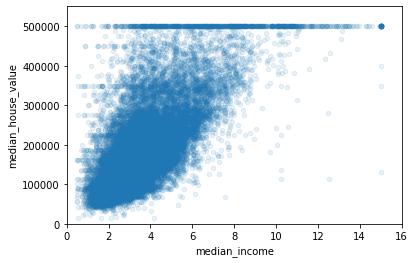

In [15]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Data Cleaning and Preparation

In [16]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [17]:
#Remove the text attribute because median can only be calculated on numerical attributes:
data_num=data.drop("ocean_proximity", axis=1)

In [18]:
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [19]:
X = imputer.transform(data_num)
data_num_clean = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_num_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [20]:
data_num_clean["rooms_per_household"] = data_num_clean["total_rooms"]/data_num_clean["households"]
data_num_clean["bedrooms_per_room"] = data_num_clean["total_bedrooms"]/data_num_clean["total_rooms"]
data_num_clean["population_per_household"]=data_num_clean["population"]/data_num_clean["households"]

In [21]:
corr_matrix = data_num_clean.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

In [22]:
#Preprocess the categorical input feature, `ocean_proximity`:
data_cat = data[["ocean_proximity"]]
data_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [24]:
#ordinal_encoder.categories_

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [26]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
data_num_clean["ocean_proximity"]=data_cat_encoded
data_clean=data_num_clean
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,3.0


In [28]:
#Splitting the dependent and independent variables

X = data_clean.iloc[:,:12]
y = data_clean.iloc[:,12]

print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [29]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 12)
(16512,)
(4128, 12)
(4128,)


In [30]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

#minmax_scale = preprocessing.MinMaxScaler()
#X_train = minmax_scale.fit_transform(X_train)
#X_test = minmax_scale.fit_transform(X_test)

## Train and test Support vector machine models

In [31]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
svm_reg1 = SVR(C=1, kernel="linear" )
svm_reg1.fit(X_train, y_train)
y_pred = svm_reg1.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg1.__class__.__name__, rmse)

RMSE of  SVR 1.5401338172250623


In [ ]:
svm_reg2 = SVR(C=1, kernel="poly" )
svm_reg2.fit(X_train, y_train)
y_pred = svm_reg2.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg2.__class__.__name__, rmse)

RMSE of  SVR 7.033220770607396


In [ ]:
svm_reg3 = SVR(C=1, kernel="rbf" )
svm_reg3.fit(X_train, y_train)
y_pred = svm_reg3.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg3.__class__.__name__, rmse)

RMSE of  SVR 1.20010473854771


In [ ]:
svm_reg4 = SVR(C=10, kernel="linear" )
svm_reg4.fit(X_train, y_train)
y_pred = svm_reg4.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg4.__class__.__name__, rmse)

RMSE of  SVR 1.5401098992199453


In [ ]:
svm_reg5 = SVR(C=10, kernel="poly" )
svm_reg5.fit(X_train, y_train)
y_pred = svm_reg5.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg5.__class__.__name__, rmse)

RMSE of  SVR 21.63168263792387


In [ ]:
svm_reg6 = SVR(C=10, kernel="rbf" )
svm_reg6.fit(X_train, y_train)
y_pred = svm_reg6.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg6.__class__.__name__, rmse)

RMSE of  SVR 1.1349562852067299


In [ ]:
svm_reg10 = SVR(C=100, kernel="rbf",gamma=0.1,epsilon=0.1)
svm_reg10.fit(X_train, y_train)
y_pred = svm_reg10.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg10.__class__.__name__, rmse)

RMSE of  SVR 1.1248245490075646


## Execusion time for the rest cells of this section: 5 hours 

## Output of the colab: None 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
rnd_search.best_params_

##  With Principal Component Analysis (PCA)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(16512, 6)

In [ ]:
svm_reg1 = SVR(C=1, kernel="linear" )
svm_reg1.fit(X_train, y_train)
y_pred = svm_reg1.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg1.__class__.__name__, rmse)

RMSE of  SVR 1.5570072268880424


In [ ]:
svm_reg2 = SVR(C=1, kernel="poly" )
svm_reg2.fit(X_train, y_train)
y_pred = svm_reg2.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg2.__class__.__name__, rmse)

RMSE of  SVR 8.479475082774721


In [ ]:
svm_reg3 = SVR(C=1, kernel="rbf" )
svm_reg3.fit(X_train, y_train)
y_pred = svm_reg3.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg3.__class__.__name__, rmse)

RMSE of  SVR 1.2352928075704823


In [ ]:
svm_reg4 = SVR(C=10, kernel="linear" )
svm_reg4.fit(X_train, y_train)
y_pred = svm_reg4.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg4.__class__.__name__, rmse)

RMSE of  SVR 1.5570132948119462


In [ ]:
svm_reg5 = SVR(C=10, kernel="poly" )
svm_reg5.fit(X_train, y_train)
y_pred = svm_reg5.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg5.__class__.__name__, rmse)

RMSE of  SVR 15.7078203665497


In [ ]:
svm_reg6 = SVR(C=10, kernel="rbf" )
svm_reg6.fit(X_train, y_train)
y_pred = svm_reg6.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg6.__class__.__name__, rmse)

RMSE of  SVR 1.2172949776742497


In [ ]:
svm_reg7 = SVR(C=100, kernel="linear" )
svm_reg7.fit(X_train, y_train)
y_pred = svm_reg7.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg7.__class__.__name__, rmse)

RMSE of  SVR 1.5570063766866977


In [35]:
svm_reg10 = SVR(C=100, kernel="rbf",gamma=0.1,epsilon=0.1)
svm_reg10.fit(X_train, y_train)
y_pred = svm_reg10.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg10.__class__.__name__, rmse)

RMSE of  SVR 1.2468981181224406
